# **Investigating factors that affect life expectancy worldwide**


##**About the team**

### **Group members**
1. Nhi Huynh s3652578
2. Nikita Phung s3783287
3. Vanessa Nguyen s3781499
4. Si Long Leong s3785099
5. Hue Phuong Le s3687477



## **Report outline**
The main outline of our report can be seen below:
* [Introduction](#intro): 
 * Brief context of our dataset, 
 * Source of dataset
 * Target response variable
 * Objective
 * Descriptive features
* [Data Cleaning](#dc):
* [Data Exploration](#de):
* [Linear Regression Modelling](#lrm):
* [Summary and Conclusions](#sc): 
* [References](#References): Sources we have referred to and used in our report

<a name = "intro"> </a>
## **Introduction**
---
All over the world, individuals are subject to various influences in their environment. The living conditions of a person, can have a great impact on them over the course of their life, from the choices they make to their overall health.

Life expectancy, is used to compare the full lifespan of individuals in a population. The World Health Organisation has taken to recording the lifespan of individuals in countries all over the world as well as other factors that may be related to this. In general, the higher the figure for life expectancy (in years), the better the overall health of a country. There are numerous factors that may impact life expectancy, so it will be a challenge to isolate the biggest contributors. 

### **Data source**
For this project, we have selected our dataset from kaggle at https://www.kaggle.com/kumarajarshi/life-expectancy-who. It has been compiled by Kumar Rajarshi, using the Global Health Observatory (GHO) data repository available on the [World Health Organisation website [link to external]](https://www.who.int/gho/database/en/) (Rajarshi, 2018).

There are 18 descriptive features in this dataset, one of which is life expectancy. The original dataset has 2938 rows, and 22 columns.


### **Objective**
Our aim is to determine which factors have the most impact on the life expectancy of a country (whether the effect is positive or negative).
As there are various factors, we will do an analysis on a few selected variables, and see which one has the biggest effect on life expectancy. 

Finding the variable with the largest impact on life expectancy, out of all the possible variables, may require a bigger and more extensive report, than is required at this time.

### **Response variable**
Out of the descriptive features, we have chosen life expectancy as our response variable / target feature. It is a continuous numerical variable, so we are able to conduct several linear regression models and graphs on it.
* *Life expectancy*: 	Life Expectancy measure in age : **continuous**

### **Explanatory variables**
* *Country*: The country participating in the research: **categorical**
* *Year*: The	year the reasearch was taken: **categorical**
* *Status*:	Developed or Developing status: **categorical**
* *Adult Mortality*:	Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population): **continuous**
* *Infant deaths*:	Number of Infant Deaths per 1000 population: **continuous**
* *Alcohol*: recorded per capita (15+) consumption (in litres of pure alcohol): **continuous**
* *Percentage expenditure*:	Expenditure on health as a percentage of Gross: **continuous**
* *Hepatitis B*:	Hepatitis B immunization coverage among 1-year-olds in percentage: **discrete**
* *Measles*: Reported Measles cases per 1000 population: **discrete**
* *BMI*: 	Average Body Mass Index of entire population: **continuous**
* *Polio*	: immunization coverage for polio among 1-year-olds in percentage: **continuous**
* *Total expenditure*:	General government expenditure on health as a percentage of total government expenditure (%): **continuous**
* *Diphtheria*: Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds in percentage: **continuous**
* *HIV/AIDS*:	Deaths per 1 000 live births HIV/AIDS (0-4 years): **continuous**
* *GDP*:	Gross Domestic Product per capita (in USD): **continuous**
* *Income composition of resources*:	Human Development Index in terms of income composition of resources : (index ranging from 0 to 1): **continuous**
* *Schooling*:	Number of years of Schooling(years): **continuous**

## **Preliminaries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as sp
import patsy
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

<a name = "dc"> </a>
## **Data Cleaning**
---

In [ ]:
import pandas as pd
import numpy as np

lifeExpectancyDataSet= pd.read_csv('https://intro-to-analytics-major-project.s3.amazonaws.com/Life+Expectancy+Data-original.csv',header=0)
lifeExpectancyCd = lifeExpectancyDataSet
lifeExpectancyDataSet.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
print(f"Shape of the dataset is {lifeExpectancyDataSet.shape} \n")

Shape of the dataset is (2938, 22) 



### Extract data
We extract the data from year 2014 to 2015. This is to avoid working with time series, since the original data set contains data from the year 2000 to 2015.

In [ ]:
LifeExpectancy2014to2015 = lifeExpectancyDataSet[lifeExpectancyDataSet['Year'] > 2013]


In [ ]:
print(f"\nNumber of missing values for each feature:")
print(LifeExpectancy2014to2015.isnull().sum())


Number of missing values for each feature:
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            178
percentage expenditure               0
Hepatitis B                         19
Measles                              0
 BMI                                 4
under-five deaths                    0
Polio                                0
Total expenditure                  183
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 57
Population                          82
 thinness  1-19 years                4
 thinness 5-9 years                  4
Income composition of resources     20
Schooling                           20
dtype: int64


###Drop irrelevant columns
Make the data clean for further investigation. The dropped colums although have more than one unique value, they are not of interest in the investigation.

In [ ]:
lifeExpectancyCdDropped= LifeExpectancy2014to2015.drop(columns=['under-five deaths ',' thinness  1-19 years',' thinness 5-9 years'])

### Rename the columns 
Rename the columns with lowercase for consistency and replace space with underscore.

In [ ]:
lifeExpectancyCdDropped.rename(columns={' BMI ':'BMI',
                                        ' HIV/AIDS':'HIV/AIDS',
                                        'Diphtheria ':'diphtheria',
                                        'Life expectancy ':'life expectancy',
                                        'Year':'year',
                                        'Adult Mortality':'adult mortality',
                                        'Hepatitis B':'hepatitis B',
                                        'Measles ':'measles',
                                        'Polio':'polio',
                                        'Total expenditure':'total expenditure',
                                        'Population':'population',
                                        'Income composition of resources':'income composition of resources',
                                        'Schooling':'schooling',
                                        'Country':'country',
                                        'Status':'status',
                                        'Alcohol':'alcohol',                                    
                                       }, inplace = True)

lifeExpectancyCdDropped.columns = [colname.replace(' ', '_') for colname in list(lifeExpectancyCdDropped.columns)]

print(lifeExpectancyCdDropped.isnull().sum())


country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            178
percentage_expenditure               0
hepatitis_B                         19
measles                              0
BMI                                  4
polio                                0
total_expenditure                  183
diphtheria                           0
HIV/AIDS                             0
GDP                                 57
population                          82
income_composition_of_resources     20
schooling                           20
dtype: int64


In [ ]:
columns = ['country','status']

for col in columns:
    lifeExpectancyCdDropped[col] = lifeExpectancyCdDropped[col].str.strip()

Cleaning up missing values. For values that are null for being zero, they have been replaced by 0.00. For values that cannot be zero, such as the population and GPA, rows with null values are dropped

In [ ]:
lifeExpectancyCdDropped["alcohol"].fillna(0.00, inplace = True) 
lifeExpectancyCdDropped["income_composition_of_resources"].fillna(0.00, inplace = True) 
lifeExpectancyCdDropped["hepatitis_B"].fillna(0.00, inplace = True) 
lifeExpectancyCdDropped["adult_mortality"].fillna(0.00, inplace = True) 
lifeExpectancyCdDropped["diphtheria"].fillna(0.00, inplace = True) 
lifeExpectancyCdDropped["total_expenditure"].fillna(0.00, inplace = True) 
lifeExpectancyCdDropped["polio"].fillna(0.00, inplace = True) 
lifeExpectancyNoNa=lifeExpectancyCdDropped.dropna()


print(lifeExpectancyNoNa.isnull().sum())

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_B                        0
measles                            0
BMI                                0
polio                              0
total_expenditure                  0
diphtheria                         0
HIV/AIDS                           0
GDP                                0
population                         0
income_composition_of_resources    0
schooling                          0
dtype: int64


The variable year is cateorgical for this dataset, therefore the date type is converted to object

In [ ]:
lifeExpectancyNoNa['year'] = lifeExpectancyNoNa.year.astype(object)
lifeExpectancy2014to2015=lifeExpectancyNoNa
print(lifeExpectancy2014to2015.dtypes)

country                             object
year                                object
status                              object
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_B                        float64
measles                              int64
BMI                                float64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
population                         float64
income_composition_of_resources    float64
schooling                          float64
dtype: object


In [ ]:
lifeExpectancy2014to2015['life_expectancy'].describe()

count    277.000000
mean      71.348014
std        8.599358
min       48.100000
25%       65.700000
50%       73.300000
75%       76.700000
max       89.000000
Name: life_expectancy, dtype: float64

In [ ]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features</b>'))
lifeExpectancy2014to2015.describe(include='float64')

,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitis_B,BMI,polio,total_expenditure,diphtheria,HIV/AIDS,GDP,population,income_composition_of_resources,schooling
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,2.770000e+02,277.000000,277.000000
mean,71.348014,154.462094,1.673646,565.799517,76.494585,40.847653,82.794224,3.154224,83.765343,0.757401,7514.610445,1.619300e+07,0.685668,12.968592
std,8.599358,103.926166,3.377030,2049.546658,30.302176,21.028169,23.250469,3.618347,22.511329,1.502049,14197.601689,8.293149e+07,0.156519,2.883773
min,48.100000,1.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,2.000000,0.100000,12.277330,4.100000e+01,0.345000,5.300000
25%,65.700000,72.000000,0.000000,0.000000,73.000000,23.300000,79.000000,0.000000,81.000000,0.100000,644.525556,2.635310e+05,0.552000,10.800000
50%,73.300000,137.000000,0.010000,1.576409,91.000000,46.700000,92.000000,1.370000,93.000000,0.100000,2729.863830,1.725744e+06,0.718000,12.900000
75%,76.700000,216.000000,0.380000,200.068444,96.000000,59.900000,97.000000,5.910000,97.000000,0.500000,7378.345289,8.633169e+06,0.798000,15.100000
max,89.000000,522.000000,15.190000,19479.911610,99.000000,77.600000,99.000000,13.730000,99.000000,9.400000,119172.741800,1.293859e+09,0.948000,20.400000


In [ ]:
display(HTML('<b>Table 2: Summary of categorical features</b>'))
lifeExpectancy2014to2015.describe(include='object')

,country,year,status
count,277,277,277
unique,139,2,2
top,Uzbekistan,2014,Developing
freq,2,139,225


<a name = "de"> </a>
## **Data Exploration**
---

### One-Variable Plots

####Box plot of life expectancy

The graph below is left-skewed. It is also revealed that the average of all countries' life expectancy between 2014 and 2015 
is 73.5 years. Therefore, there are more countries with people living their average of less than 73.5 years than countries
with people living more than 73.5 years. Also, 25% of all countries having average life span of people under 65.7 years old,
50% are between 65.7 and 77 years old and 25% more than 77 years old. 

What's more, the life expectancy of all countries ranges between 48.1 and 89.0 years old (range = 40.9) while the spread of
this for the middle 50% of all countries is much smaller and more consistent (IQR = 11.3).

We also see that there is one lower outlier in the distribution of life expectancy in all countries which is 48.8

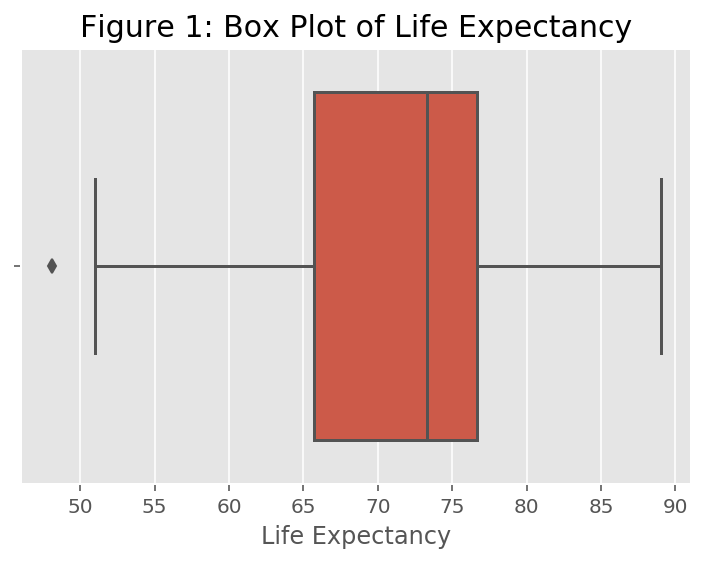

In [ ]:
sns.boxplot(lifeExpectancy2014to2015['life_expectancy']).set_title('Figure 1: Box Plot of Life Expectancy', fontsize = 15)
plt.xlabel('Life Expectancy')
plt.show();

In [ ]:
Median = lifeExpectancy2014to2015['life_expectancy'].median()
Q1 = lifeExpectancy2014to2015['life_expectancy'].quantile(0.25)
Q3 = round(lifeExpectancy2014to2015['life_expectancy'].quantile(0.75),1)
IQR = round(Q3 - Q1,1)
Min = round(lifeExpectancy2014to2015['life_expectancy'].min(),1)
Max = round(lifeExpectancy2014to2015['life_expectancy'].max(),1)
Outliers = round(Q1 - 1.5*IQR, 1)

print("Median = Q2 =", Median)
print("Q1 =", Q1)
print("Q3 =", Q3)
print("IQR =", IQR)
print("Min =", Min)
print("Max =", Max)

Median = Q2 = 73.3
Q1 = 65.7
Q3 = 76.7
IQR = 11.0
Min = 48.1
Max = 89.0


####Histogram of schooling

The histogram in figure 2 below has only one peak and a bell shaped curve, resulting in symmetric and unimodal. In other word, it is is normal distribution.

It is clearly showed that there is a significant difference in schooling rate between countries. As we can see, most of countries has a tendency that people spend around between 10 and 15 years on education (average = 13 years). However, it appears some countries where the year in school is average of 18 years (pretty high) and even some with only approximate 7 years attending school.

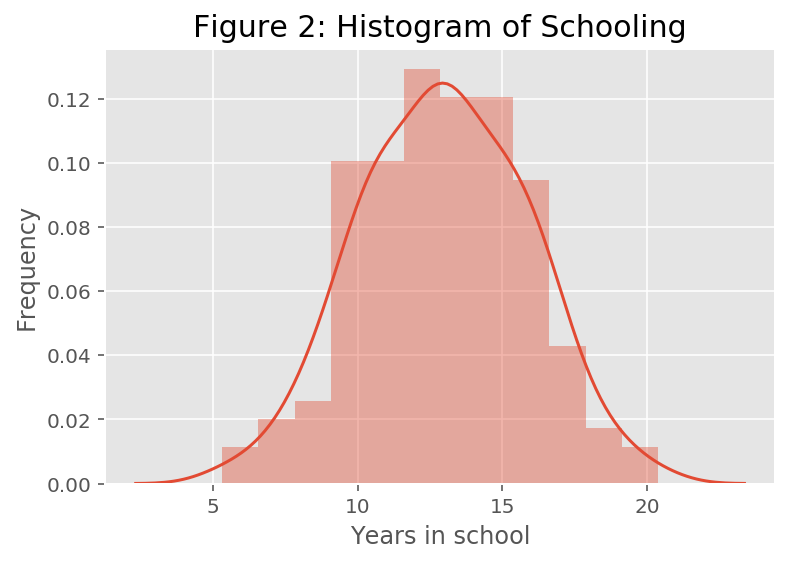

In [ ]:
sns.distplot(lifeExpectancy2014to2015['schooling'], kde = True).set_title('Figure 2: Histogram of Schooling', fontsize = 15)
plt.ylabel('Frequency')
plt.xlabel('Years in school')
plt.show();

In [ ]:
print("Mean = ", round(lifeExpectancy2014to2015['schooling'].mean(),1))
print("SD =", round(lifeExpectancy2014to2015['schooling'].std(),1))

Mean =  13.0
SD = 2.9


### Two-Variable Plots

####Box plot of life expectancy by development status

The graph indicates that the average life expectancy of developed countries is higher compared to developing countries. 
This is supported by the numerical measures. Although the maximum years of life expectancy is similar in all the countries
(Max = 89 years), the median life expectancy for developed countries is 81.6, higher than for developing countries which is 
71.2 years old. Moreover, even for the third quartile of the developing countries' distribution (75.0) is lower than the 
median life expectancy for developed countries. In conclusion, people from developed countries live longer compared to who 
come from developing countries.

The practical interpretation of the results we obtained is that the life expectancy in developed countries is much more 
consistent than it is in developing countries, which varies a lot. Judging by the range of the data, there is much more 
variability in the developing countries’ distribution (range = 40.9) than there is in the developed countries’ distribution 
(range = 15.6). Similarly if we look at the IQR, which measures the variability only among the middle 50% of the 
distribution, we see the spread in the life expectancy for developing countries (IQR = 10.9) is still higher than developed 
countries' (IQR = 4.4). We conclude that among all the countries, the developed countries’ life expectancy are more alike 
than the developing countries’.

There are no outliers at all in both developing countries' and developed countries' distributions.

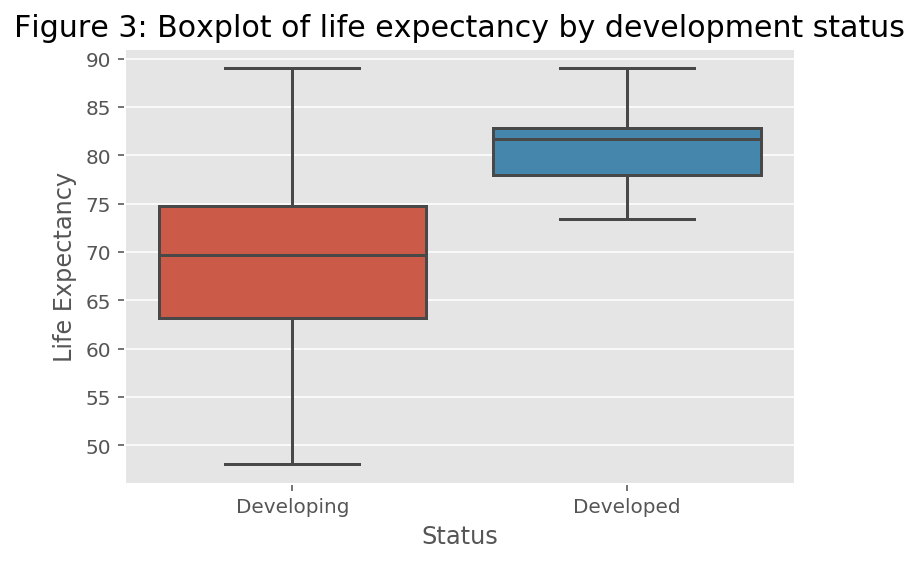

In [ ]:
sns.boxplot(lifeExpectancy2014to2015['status'], lifeExpectancy2014to2015['life_expectancy']);
plt.title('Figure 3: Boxplot of life expectancy by development status', fontsize = 15)
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show();

In [ ]:
developing = lifeExpectancy2014to2015[lifeExpectancy2014to2015['status'] == 'Developing']
developed = lifeExpectancy2014to2015[lifeExpectancy2014to2015['status'] == 'Developed']
developingMedian = round(developing['life_expectancy'].median(), 1)
developingQ1 = round(developing['life_expectancy'].quantile(0.25), 1)
developingQ3 = round(developing['life_expectancy'].quantile(0.75), 1)
developingIQR = round(developingQ3 - developingQ1, 1)
developingMin = round(developing['life_expectancy'].min(), 1)
developingMax = round(developing['life_expectancy'].max(), 1)
print("For developing countries: ")
print(" Median = Q2 =", developingMedian)
print(" Q1 =", developingQ1)
print(" Q3 =", developingQ3)
print(" IQR =", developingIQR)
print(" Minimum =", developingMin)
print(" Maximum =", developingMax)
developedMedian = round(developed['life_expectancy'].median(), 1)
developedQ1 = round(developed['life_expectancy'].quantile(0.25), 1)
developedQ3 = round(developed['life_expectancy'].quantile(0.75), 1)
developedIQR = round(developedQ3 - developedQ1, 1)
developedMin = round(developed['life_expectancy'].min(), 1)
developedMax = round(developed['life_expectancy'].max(), 1)

print('''
For developed countries: ''')
print(" Median = Q2 =", developedMedian)
print(" Q1 =", developedQ1)
print(" Q3 =", developedQ3)
print(" IQR =", developedIQR)
print(" Minimum =", developedMin)
print(" Maximum =", developedMax)

For developing countries: 
 Median = Q2 = 69.7
 Q1 = 63.2
 Q3 = 74.8
 IQR = 11.6
 Minimum = 48.1
 Maximum = 89.0

For developed countries: 
 Median = Q2 = 81.8
 Q1 = 78.0
 Q3 = 82.8
 IQR = 4.8
 Minimum = 73.4
 Maximum = 89.0


#### Scatterplot of life expectancy and GDP

The scatterplot in Figure 8 displays a strong correlation between life expectancy and GDP. At lower GDP ranges from 0-10000, life expectancy widely varies around 40-85. As GDP increases, life expectancy tends to be more predictable at around 80. 

This trend implies that countries with higher GDP can ensure a consistent, higher life expectancy for its citizens, while citizens of countries with lower GDP can die earlier and at less predictable age.

In [ ]:
#Rename columns for the worldwide life expextancy dataset
lifeExpectancyCd.rename(columns={' BMI ':'BMI',
                                  ' HIV/AIDS':'HIV_AIDS',
                                  'Diphtheria ':'diphtheria',
                                  'Life expectancy ':'life expectancy',
                                  'Year':'year',
                                  'Adult Mortality':'adult mortality',
                                  'Hepatitis B':'hepatitis B',
                                  'Measles ':'measles',
                                  'Polio':'polio',
                                  'Total expenditure':'total expenditure',
                                  'Population':'population',
                                  'Income composition of resources':'income composition of resources',
                                  'Schooling':'schooling',
                                  'Country':'country',
                                  'Status':'status',
                                  'Alcohol':'alcohol',                                    
                                 }, inplace = True)
lifeExpectancyCd.head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis B,measles,BMI,under-five deaths,polio,total expenditure,diphtheria,HIV_AIDS,GDP,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


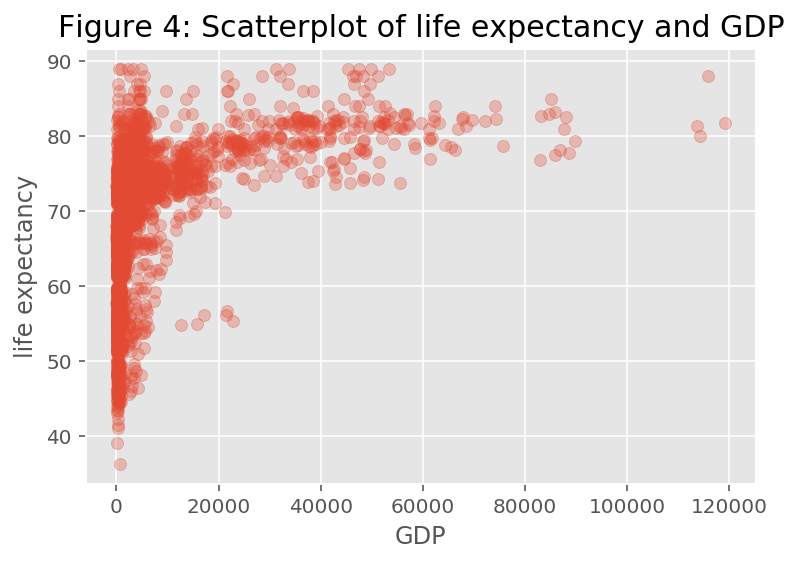

In [ ]:
# Creating a scatter plot
plt.scatter(lifeExpectancyCd['GDP'], lifeExpectancyCd['life expectancy'], alpha = 0.3)
plt.title('Figure 4: Scatterplot of life expectancy and GDP', fontsize = 15)
plt.xlabel('GDP')
plt.ylabel('life expectancy')
plt.show();

###Three-variable plots



####Scatterplot of life expectancy and GDP

The scatterplot in Figure 8 illustrates apparent distinctions between life expectancy in developing and developed countries.

It is clearly seen that developed countries enjoy a consistently high life expectancy of around 80 years, while developing countries have more volatile range for life expectancy. 

The lower the GDP a country has, the lower and more varied life expectancy can be (40-80 years). The life expectancy is higher and more stable as the data funnel towards 80 years. 

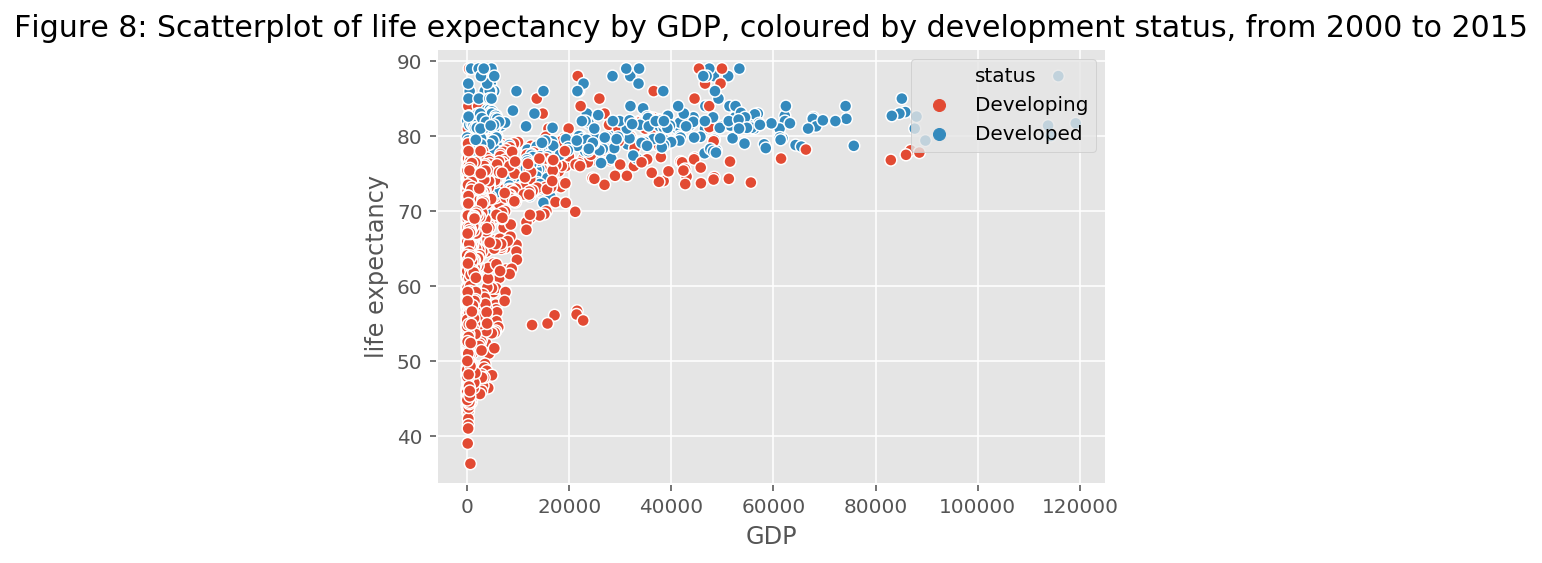

In [ ]:
# creating a scatterplot
sns.scatterplot(lifeExpectancyCd['GDP'], lifeExpectancyCd['life expectancy'], hue = lifeExpectancyCd['status'])
plt.title('Figure 8: Scatterplot of life expectancy by GDP, coloured by development status, from 2000 to 2015', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

#### Boxplot of life expectancy by countries and development status

The boxplots in Figure 8 confirms the distinction found in the scatterplot in figure 7. It is revealed that developed countries like Australia, Belgium, and Germany have significantly higher life expectancy  than developing countries like Indonesia, Ukraine and Viet Nam. 

The boxplots also present that the boxplots from developed countries stay at the same height (around 80-82), while developing countries has a wide range of life expectancy (Indonesia has the lowest of around 67, then Ukraine, then Viet Nam at around 75, the highest among developing countries).

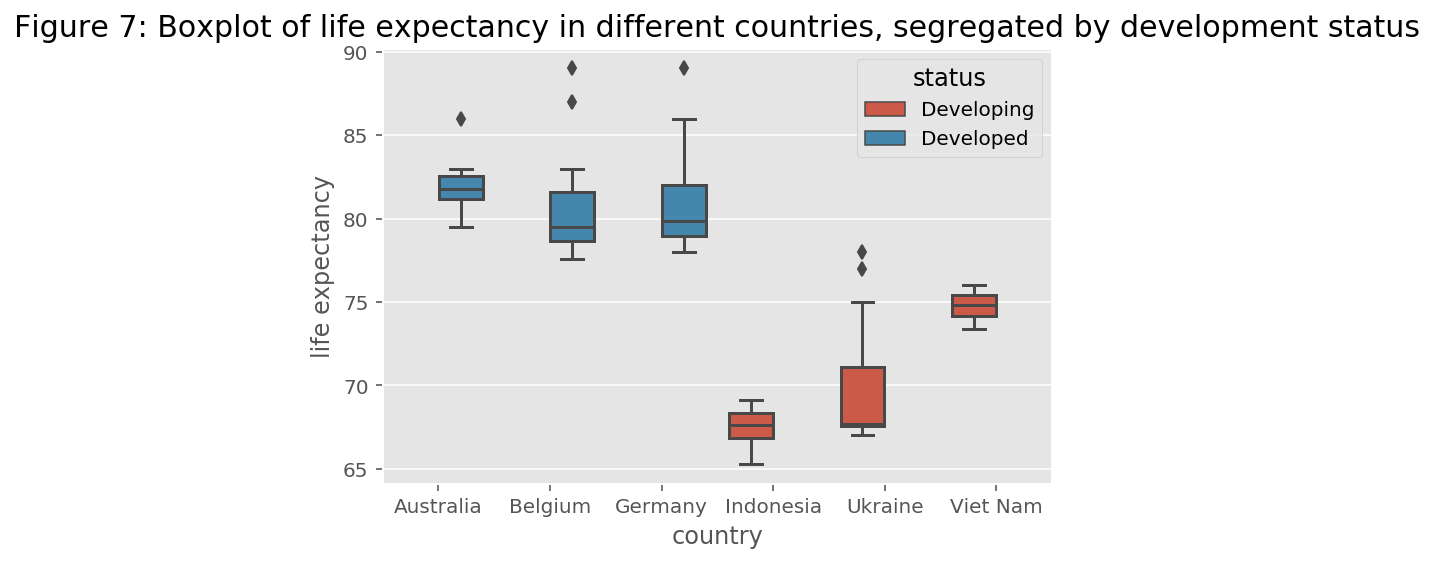

In [ ]:
# Getting the index of those who have completed their Bachelors or graduated highschool
country_mask = lifeExpectancyCd[lifeExpectancyCd['country'].isin(['Australia','Belgium', 'Germany', 'Indonesia', 'Viet Nam', 'Ukraine'])] 

# Creating the boxplot
sns.boxplot(country_mask['country'], lifeExpectancyCd['life expectancy'], 
            hue = lifeExpectancyCd['status'])
plt.title('Figure 7: Boxplot of life expectancy in different countries, segregated by development status', fontsize = 15)
plt.show();

<a name = "lrm"> </a>
#**Linear Regression Modelling**
---

Models:

[Life Expectancy & Education](#education)

[Life Expectancy & Economy](#eco)

[Life Expectancy & Health](#health)

[Full Model](#full)

[Backwards Variable Selection](#bvs)


In [ ]:
#Renaming data to df for convenience.
df = lifeExpectancy2014to2015
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,polio,total_expenditure,diphtheria,HIV/AIDS,GDP,population,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,99.0,6.00,99.0,0.1,3954.227830,28873.0,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,98.0,5.88,98.0,0.1,4575.763787,288914.0,0.761,14.2
32,Algeria,2015,Developing,75.6,19.0,21,0.00,0.000000,95.0,63,59.5,95.0,0.00,95.0,0.1,4132.762920,39871528.0,0.743,14.4


<a name="education" > </a>
## **Life Expectancy and Education**


This model will be graphed to see whether there is a correlation between life expectancy and schooling (number of years of schooling) per country.


It is predicted that countries with a higher number of years in 
schooling the higher their life expectancy will be. This is because countries that have a higher amount of years of schooling tend to be developed countries that can afford substantial education for its population.

In [ ]:
#Getting rid of 0 values from the 'schooling' column
df = df[df.schooling != 0.0]

In [ ]:
formula_string = "life_expectancy ~ schooling"
model = sm.formula.ols(formula=formula_string, data=df)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     570.7
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           4.80e-69
Time:                        13:53:15   Log-Likelihood:                -832.97
No. Observations:                 277   AIC:                             1670.
Df Residuals:                     275   BIC:                             1677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.5795      1.362     29.057      0.0

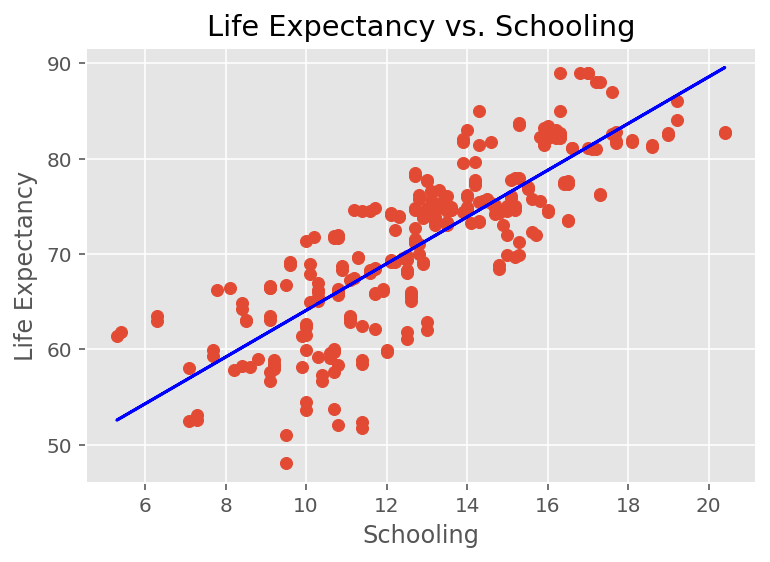

In [ ]:
#Plotting the graph
x = df['schooling']
y = df['life_expectancy']
y_pred = model_fitted.predict(x)
plt.scatter(x,y)
plt.plot(x, y_pred, 'blue')
plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show();

From the graph, there is a positive linear relationship and as predicted, countries that have a higher amount of years of schooling also tend to have a higher life expectancy. This model has an adjusted R-Squared of 0.674, which means about 67.4% of the variance is explained by the model. The p-value for the slope coefficient is 0.000, showing that the value is highly significant - so we reject the null hypothesis that the coefficient for schooling is 0. From this scatterplot, it is observed that the plots are relatively normal.

### **Residuals**

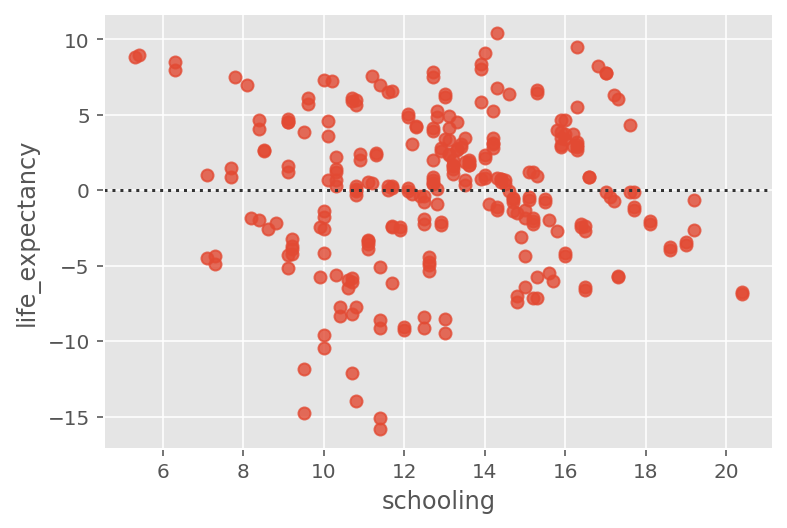

In [ ]:
sns.residplot(x, y)
plt.show()

From the graph, we can see that generally the plots are gathered around 0, however there are quite a few that have a large distance below and above the line - for instance from the interval between 8 and 12 schooling years, the residuals are largely negative.

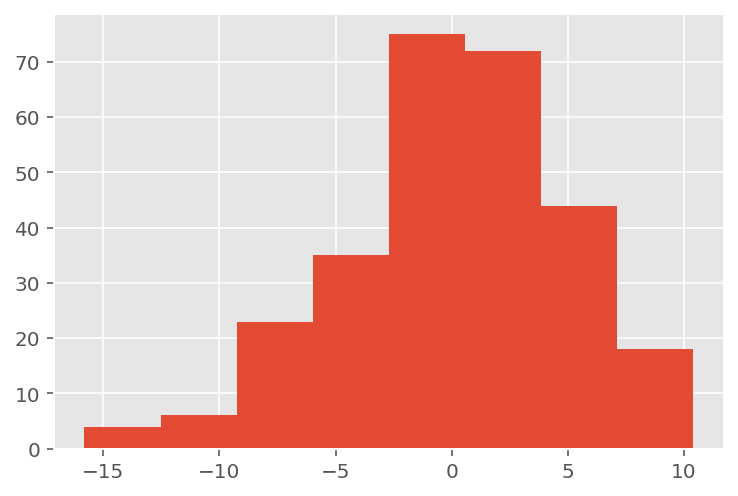

In [ ]:
residuals = y - y_pred
plt.hist(residuals, bins = 8)
plt.show()

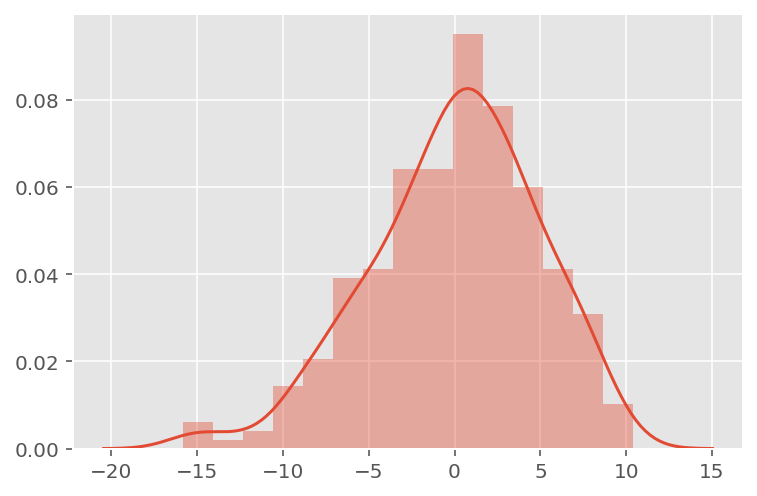

In [ ]:
residuals = y - y_pred
sns.distplot(residuals)
plt.show()

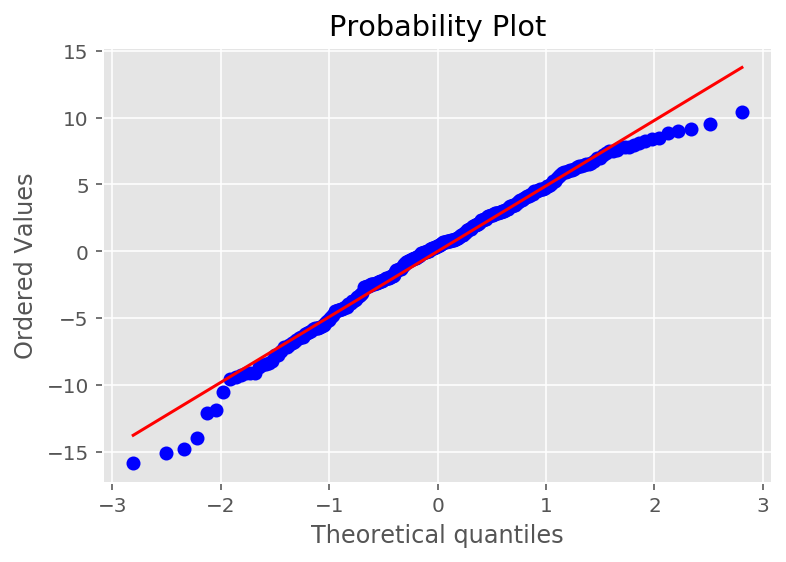

In [ ]:
sp.probplot(residuals, plot = plt)
plt.show()

Plotting the residuals in the histograms we are able to see that they are approximately normal, although it is slightly skewed left.
The Probabilty Plot also shows this, as most of the plots situate on the line.

<a name="eco"></a>
## **Life Expectancy and Economy**


This model will plot the actual life expectancy with the predicted life expectancy based on all the economic variables - GDP, income composition of resources, percentage expenditure and total expenditure.


In [ ]:
df = df[df.GDP != 0.0]
formula_string = "life_expectancy ~ GDP + income_composition_of_resources + percentage_expenditure + total_expenditure"
model = sm.formula.ols(formula=formula_string, data=df)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     305.8
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           2.44e-99
Time:                        13:53:16   Log-Likelihood:                -752.52
No. Observations:                 277   AIC:                             1515.
Df Residuals:                     272   BIC:                             1533.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

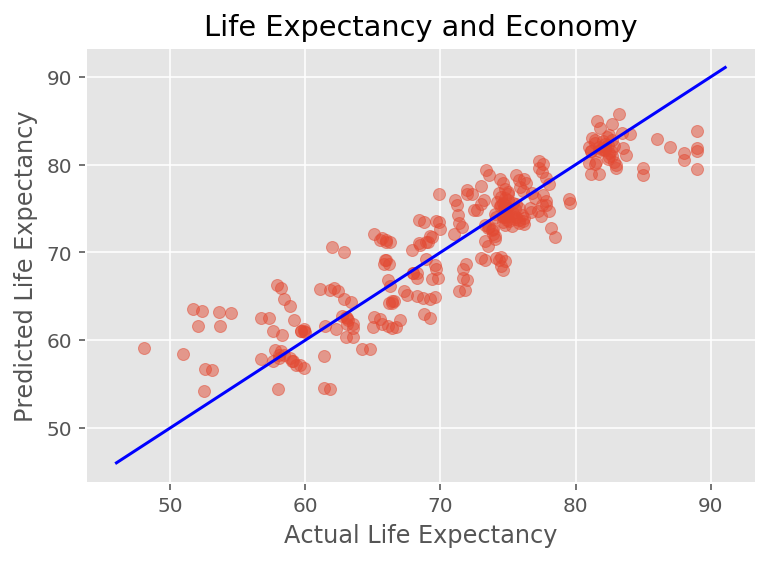

In [ ]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
y = df['life_expectancy']
y_pred = model_fitted

plt.scatter(y,y_pred.fittedvalues, alpha = 0.5)
plot_line(axis = plt.gca(), slope = 1, intercept = 0, color = 'blue')
plt.title('Life Expectancy and Economy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.show();

The relationship between the Actual Life Expectancy and the Predicted is positively linear as shown in the model and the model is reasonably well fitted.
This adjusted R-Squared value is 0.815, meaning that 81.5% of the variance is described in the model. Referring to the coefficients, three of the five values have a p-value of above 0.2 which indicates that these values are insignificant. These three values are: GDP, percentage expenditure and total expenditure. From the scatterplot it is also observed that the model is skewed left. There are not many outliers in this model, the largest outliers seem to range from 40 to 55 in the x axis, where the residuals are positve.

### **Residuals**

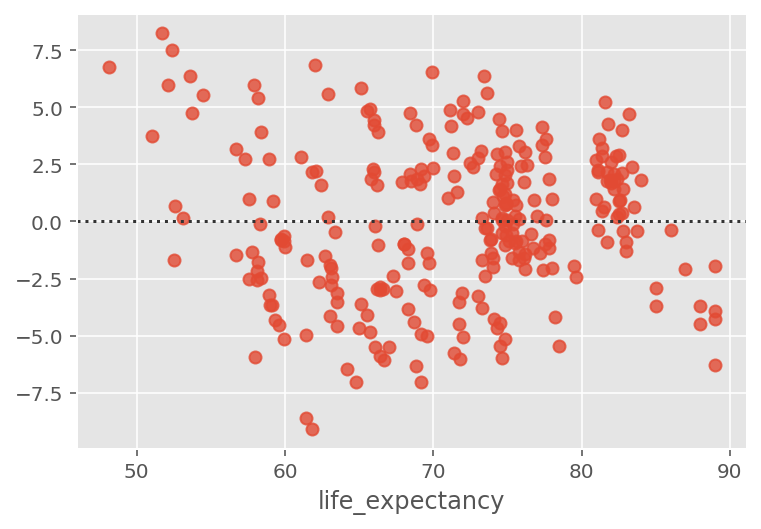

In [ ]:
sns.residplot(y, y_pred.fittedvalues)
plt.show()

From this graph, the residuals are roughly centred around 0. The residuals that are closest to 0 are the plots in the interval from 70 to 80 on the x axis. Below 70, the plots seem to be random, and they do not gather as close to 0 compared to the plots from 70 to 80.  The largest outliers reside in between 60 and 70 along the x axis, where the residuals are negative, and from 45 to 55, where the residuals are positive.

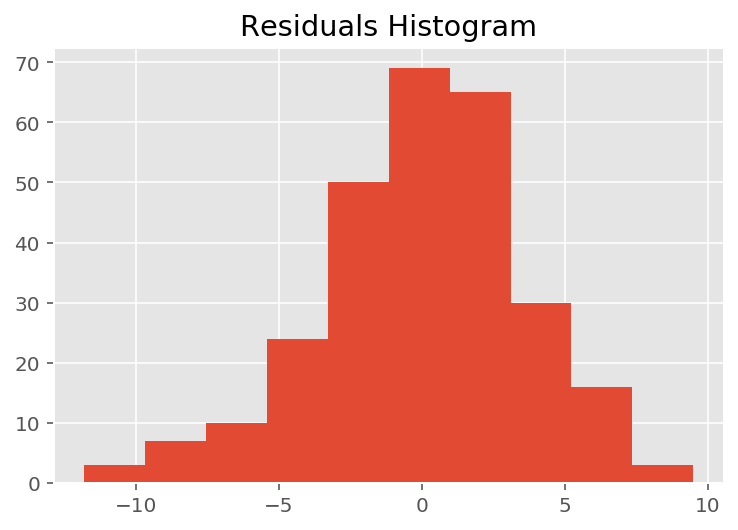

In [ ]:
residuals = y - y_pred.fittedvalues
plt.hist(residuals, bins = 10)
plt.title('Residuals Histogram')
plt.show()

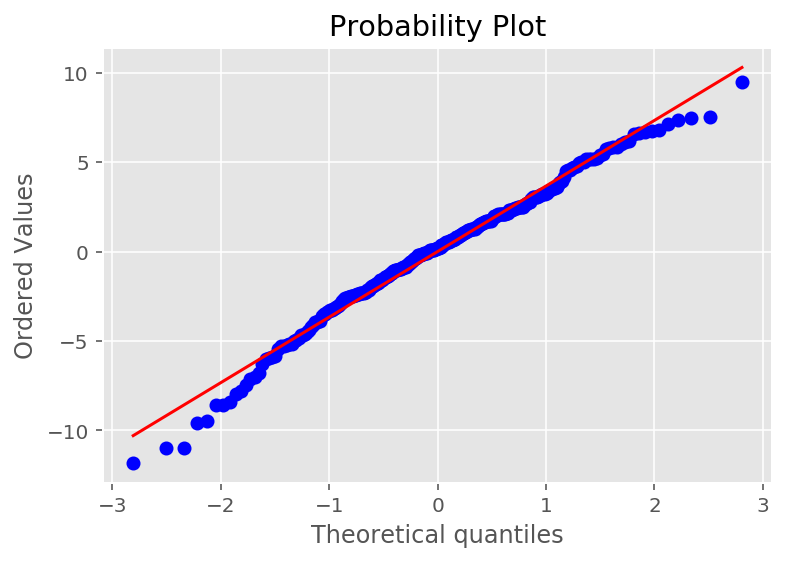

In [ ]:
sp.probplot(residuals, plot = plt)
plt.show()

From the histogram, the residuals are relatively normal, this is further reinforced from the Probability Plot as the majority of the plots situate on the line. The points tend to misalign where they are below -2 and above 2 along the x axis.

<a name= "health"></a>
## **Life Expectancy and Health**


This model will plot the actual life expectancy with the predicted life expectancy based on all the variables relating to health = HIV/AIDS, Hepatitis B, Diphtheria, Polio, Measles, alcohol, and body mass index (BMI).

In [ ]:
df.rename(columns= {'HIV/AIDS' : 'AIDS'}, inplace = True)

formula_string = "life_expectancy ~ AIDS + hepatitis_B + diphtheria + polio + measles + alcohol + BMI + infant_deaths"
model = sm.formula.ols(formula=formula_string, data=df)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     58.06
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           3.31e-54
Time:                        13:53:18   Log-Likelihood:                -849.30
No. Observations:                 277   AIC:                             1717.
Df Residuals:                     268   BIC:                             1749.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        61.1234      1.595     38.318

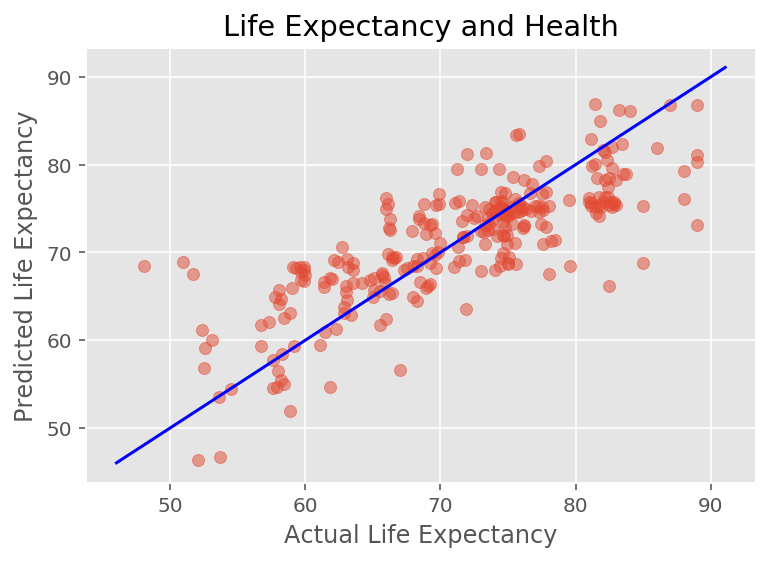

In [ ]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
y = df['life_expectancy']
y_pred = model_fitted

plt.scatter(y,y_pred.fittedvalues, alpha = 0.5)
plot_line(axis = plt.gca(), slope = 1, intercept = 0, color = 'blue')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy and Health')
plt.show();

There is a linear relationship between Actual Life Expectancy and Predicted and shown in the model, the model is fitted as best as it can be, as there are many outliers.
The adjusted r-squared of 0.623, meaning that 62.3% of the variance is described in the model. Majority of the p-values for the coefficients are significant, only one of them is not - measles (p-value = 0.286). From the scatter-plot the data is slightly skewed left. As mentioned, there are  quite a few outliers in this model - most of which range between 40 and 55 in the x axis where the residual is positive. There are also a few outliers ranging from 80 to 90 in the x axis, where the residuals are negative.

### **Residuals**

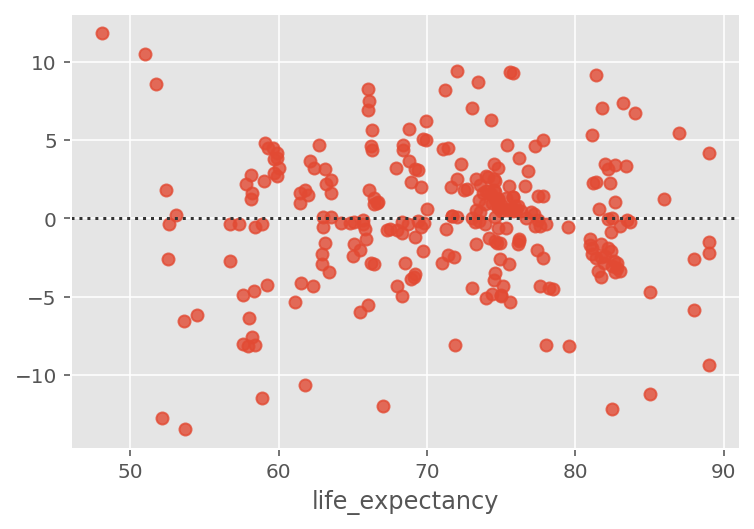

In [ ]:
sns.residplot(y, y_pred.fittedvalues)
plt.show()

Generally the residuals seem to centre around 0, however most of the plots seem to have a fair distance from the line. As mentioned before, the largest residuals seem to situate between 40 and 55 along the x axis. The plots that have the greatest distance from 0 (below -10) are mostly negative residuals.

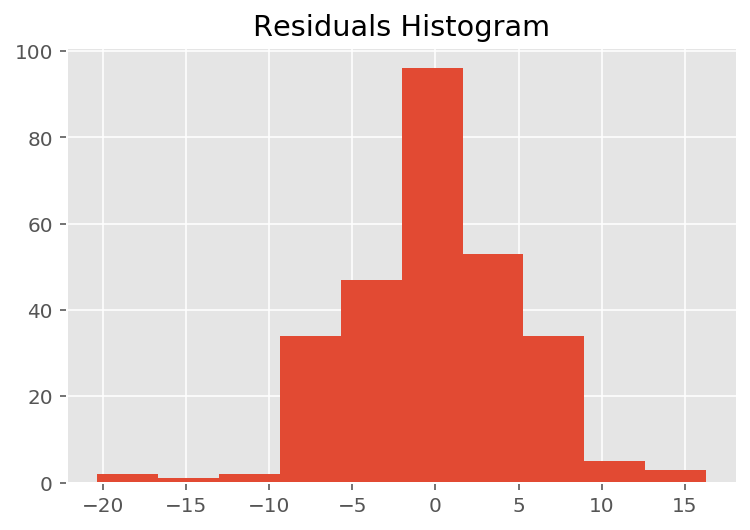

In [ ]:
residuals = y - y_pred.fittedvalues
plt.hist(residuals, bins = 10)
plt.title('Residuals Histogram')
plt.show()

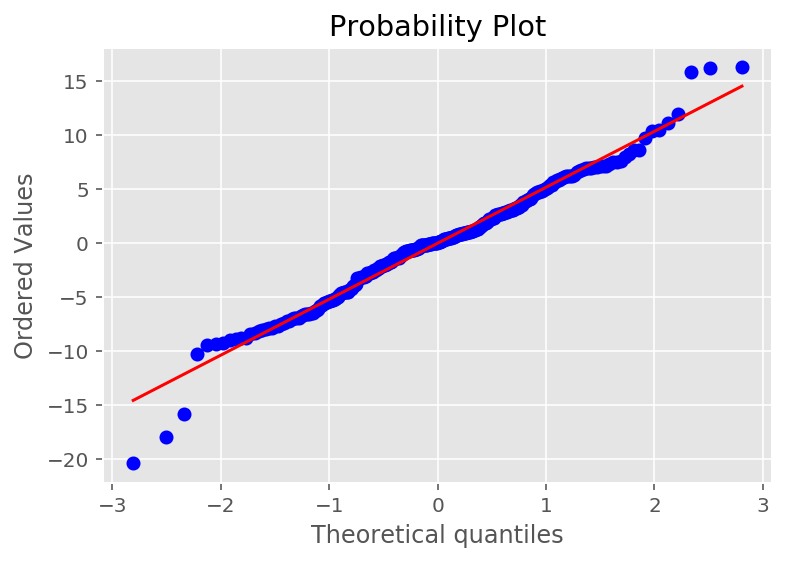

In [ ]:
sp.probplot(residuals, plot = plt)
plt.show()

From the histogram,  it is observed that the residuals are approximately normal. Furthermore, the Probability Plot also emphasises on this, as most of the points situate on the line. These plots range between -2 and 2.2, but outside this range the plots do not align and seem to trail off the line.

<a name="full"> </a>
## **Full Model**

---



In [ ]:
df.rename(columns= {'HIV/AIDS' : 'AIDS'}, inplace = True)
df = df[df.GDP != 0.0]
df = df[df.schooling != 0.0]
formula_string = "life_expectancy ~ AIDS + hepatitis_B + diphtheria + measles + polio + alcohol + BMI + infant_deaths \
+ GDP + income_composition_of_resources + percentage_expenditure + total_expenditure + schooling"
model = sm.formula.ols(formula=formula_string, data=df)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sat, 26 Oct 2019   Prob (F-statistic):          1.61e-105
Time:                        13:53:19   Log-Likelihood:                -712.83
No. Observations:                 277   AIC:                             1454.
Df Residuals:                     263   BIC:                             1504.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

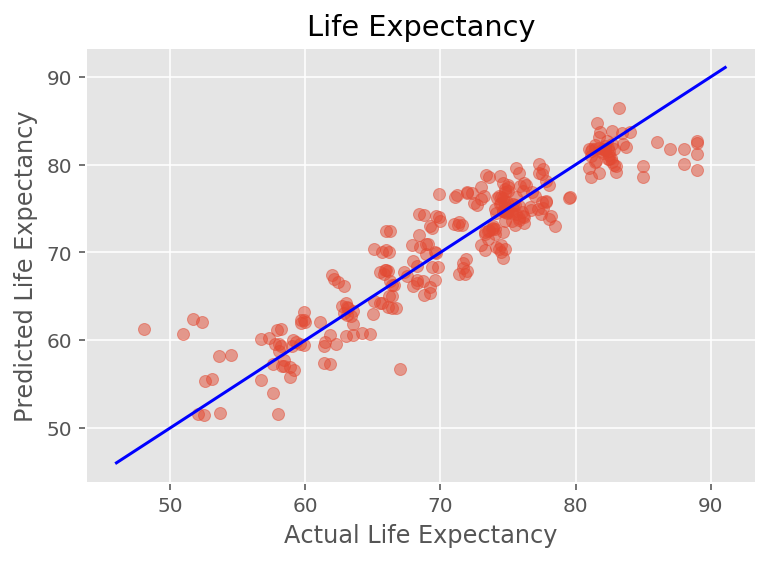

In [ ]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
y = df['life_expectancy']
y_pred = model_fitted

plt.scatter(y,y_pred.fittedvalues, alpha = 0.5)
plot_line(axis = plt.gca(), slope = 1, intercept = 0, color = 'blue')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy')
plt.show();

There is a positive linear relationship between the Actual Life Expectancy and Predicted, and the model is reasonably well fitted.
The adjusted R-Squared value is 0.857, meaning that 85.7% of the variance is described in the model. 
Regarding to coefficients, there are quite a few p-values that are not significant. These include: Hepatitis B, Diphtheria, Measles, Polio, alcohol, BMI, infant deaths, GDP, percentage expenditure, total expenditure and schooling - unfortunately this is the majority of the variables in the data. There are only a few outliers in this model, the largest ones are observed to be positive residuals which reside between 45 and 55 along the x axis. It is also abserved that the actual life expetancy is slightly left skewed.

### Residuals

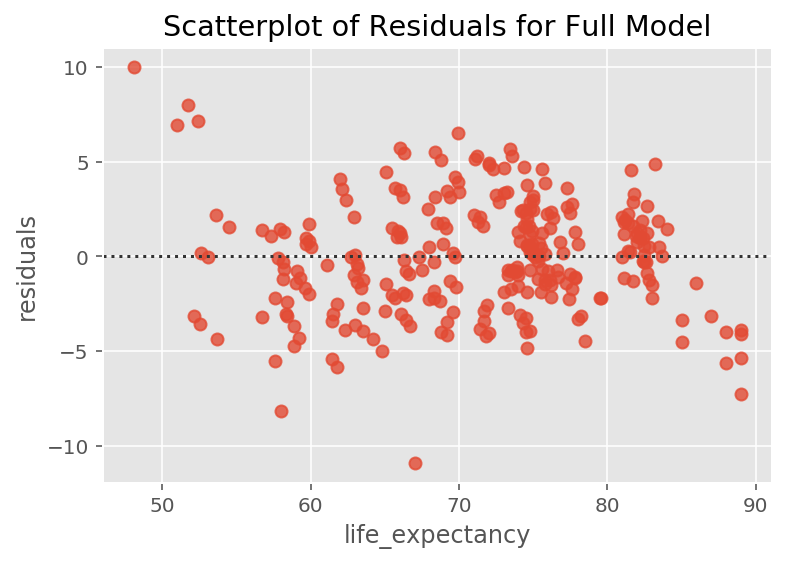

In [ ]:
sns.residplot(y,y_pred.fittedvalues)
plt.ylabel('residuals')
plt.title('Scatterplot of Residuals for Full Model')
plt.show()

From the scatterplot, it is observed that the majority of the plots reside between 5 and -5, which makes the model valid. However there are some outliers, the largest outlier is a negative residual between 60 and 70 along the x axis and it is just below -10 on the y axis, the second largest outlier is a positive residual below 50 along the x axis and exactly on 10 on the y axis. Apart from these outliers, the points are generally centred on 0.

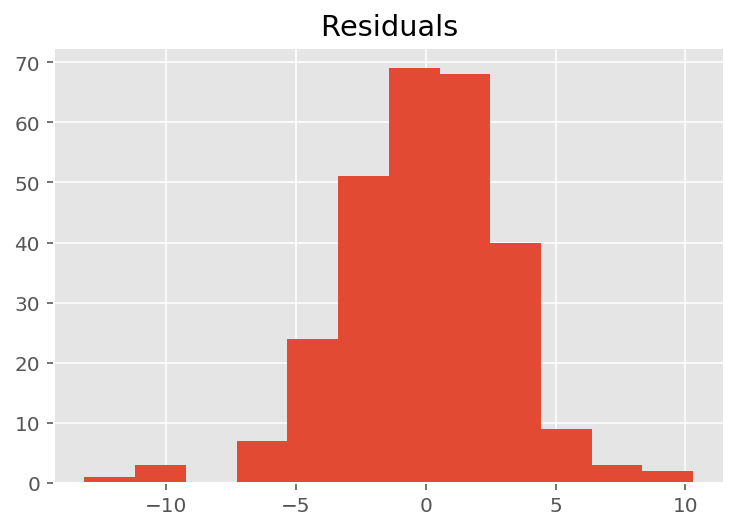

In [ ]:
residuals = y - y_pred.fittedvalues
plt.hist(residuals, bins = 12)
plt.title('Residuals')
plt.show()

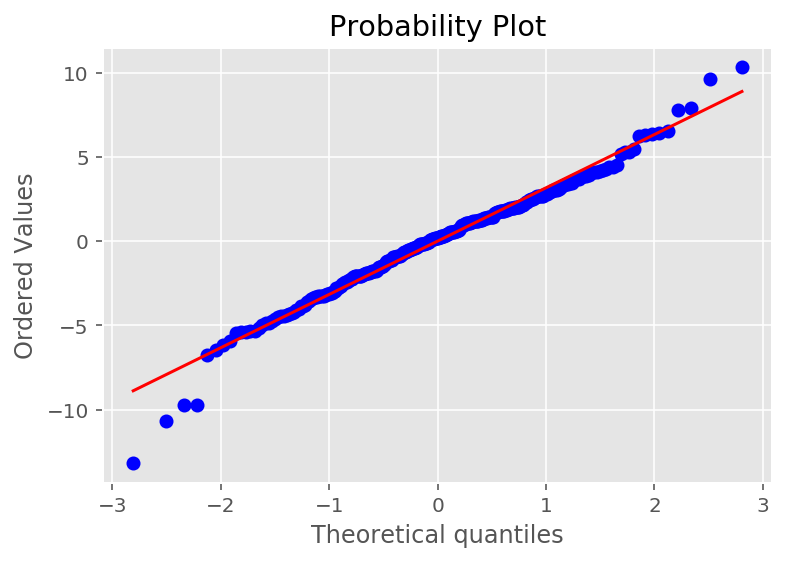

In [ ]:
sp.probplot(residuals, plot = plt)
plt.show()

From the histogram, the residuals are approximately normal, this is also shown in the Probability Plot as the majority of the points sit on the line,

<a name = "bvs"></a>
## **Backwards Variable Selection**

Now we will perform backwards variable selection using p-values, where the significance level is 0.05.

In [ ]:
## create the patsy model desc from formula
my_linreg_patsy = patsy.ModelDesc.from_formula(formula_string)
###
# initialize variable-selected fit to full model
linreg_fit = model_fitted
#########
## do backwards elimination using p-values
p_val_cutoff = 0.05
for i in range(len(linreg_fit.model.exog_names)):
    pval_series = linreg_fit.pvalues.copy()
    pval_series.sort_values(ascending=False, inplace=True)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    print(f"iteration: {i}, removing term: {term}, p-value: {pval:.3f}")
    terms = term.split(':')
    if (len(terms) == 1): ## this is a main effect term
        my_linreg_patsy.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term)]))    
    else: ## this is an interaction term
        my_linreg_patsy.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(terms[0]), patsy.EvalFactor(terms[1])]))    
    linreg_fit = smf.ols(formula = my_linreg_patsy, data = df).fit()
#########

###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = my_linreg_patsy, data = df).fit()
###
    
#########
print("***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")

iteration: 0, removing term: measles, p-value: 0.843
iteration: 1, removing term: alcohol, p-value: 0.745
iteration: 2, removing term: GDP, p-value: 0.706
iteration: 3, removing term: schooling, p-value: 0.604
iteration: 4, removing term: polio, p-value: 0.524
iteration: 5, removing term: BMI, p-value: 0.460
iteration: 6, removing term: percentage_expenditure, p-value: 0.376
iteration: 7, removing term: hepatitis_B, p-value: 0.259
iteration: 8, removing term: infant_deaths, p-value: 0.175
iteration: 9, removing term: total_expenditure, p-value: 0.089
***
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     555.1
Date:                Sat, 26 Oct 2019   Prob (F-statistic):          7.76e-116
Time:                        13:53:21   Log-

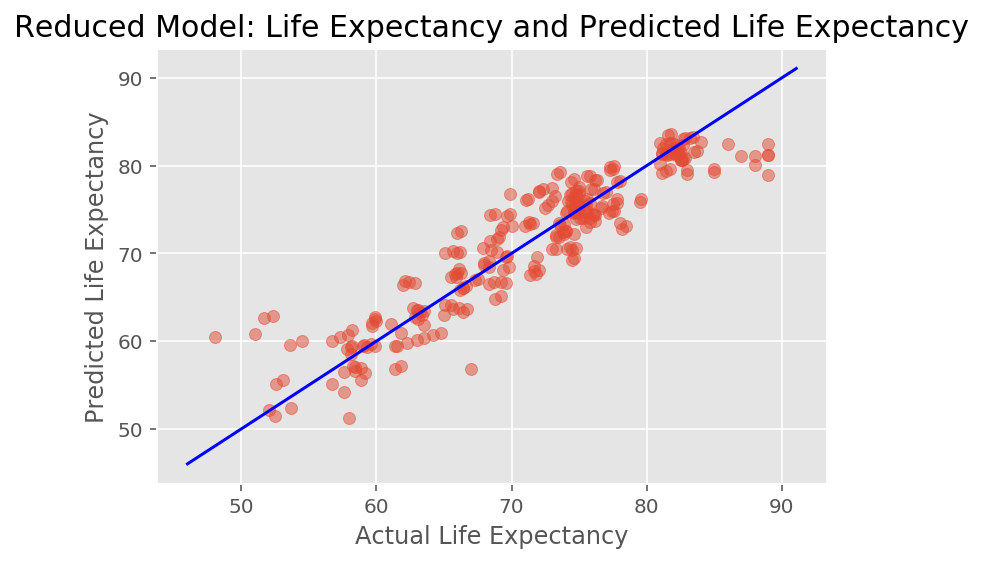

In [ ]:
# Creating scatter plot
plt.scatter(df['life_expectancy'], model_reduced_fitted.fittedvalues, alpha=0.5);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="blue");
plt.xlabel('Actual Life Expectancy');
plt.ylabel('Predicted Life Expectancy');
plt.title('Reduced Model: Life Expectancy and Predicted Life Expectancy', fontsize=15);
plt.show(); 

Like the full model, the reduced model has a positive linear relationship with Actual Life Expectancy and Predicted Life Expectancy. Upon observation, there does not seem to be a large difference between the two models, although the adjusted R-Squared value is slightly higher (0.858) in the reduced model. Unfortunately the majority of the variables were removed to create the reduced model as most of the coefficients of these variables had a p-value over 0.05. As a result only 3 variables were used - HIV/AIDS, Diphtheria and income composition of resources. The p-value of the reduced model is 0.0, meaning the coefficients used are significant.

### Residuals

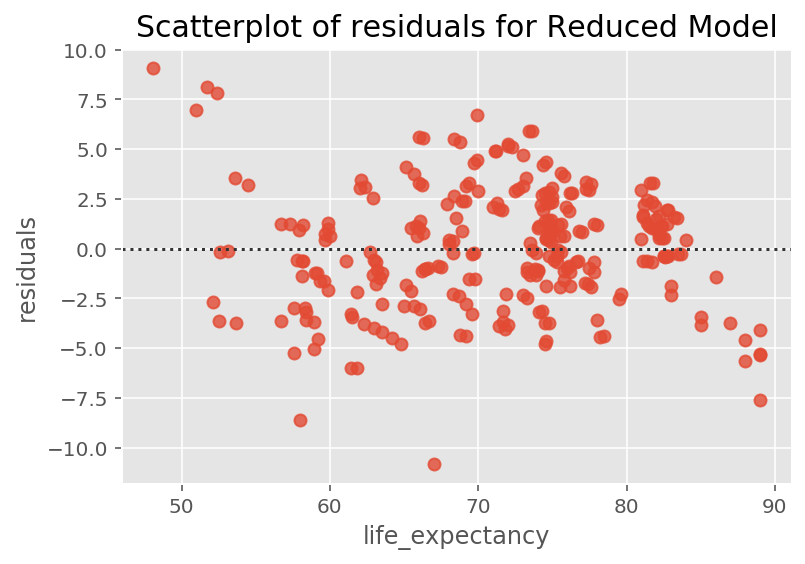

In [ ]:
sns.residplot(x=df['life_expectancy'],  y=model_reduced_fitted.fittedvalues);
plt.ylabel('residuals')
plt.title('Scatterplot of residuals for Reduced Model', fontsize=15)
plt.show();

The full model and the reduced model have similar residuals. The the most significant outliers in this model are in between the same intervals as the full model - between 45 and 55, there are some positive residuals and betweent 65 and 70, there is one major negative residual.

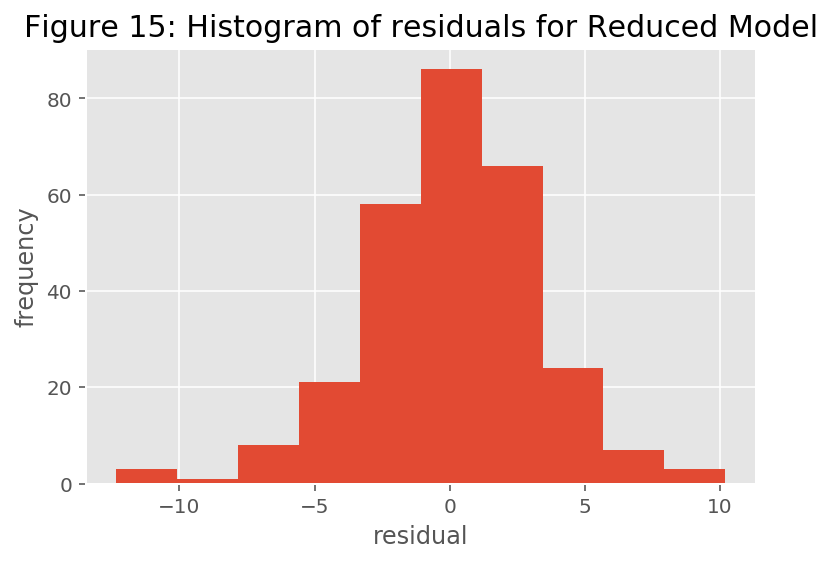

In [ ]:
residuals2 = df['life_expectancy'] - model_reduced_fitted.fittedvalues
plt.hist(residuals2, bins = 10);
plt.xlabel('residual');
plt.ylabel('frequency');
plt.title('Figure 15: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

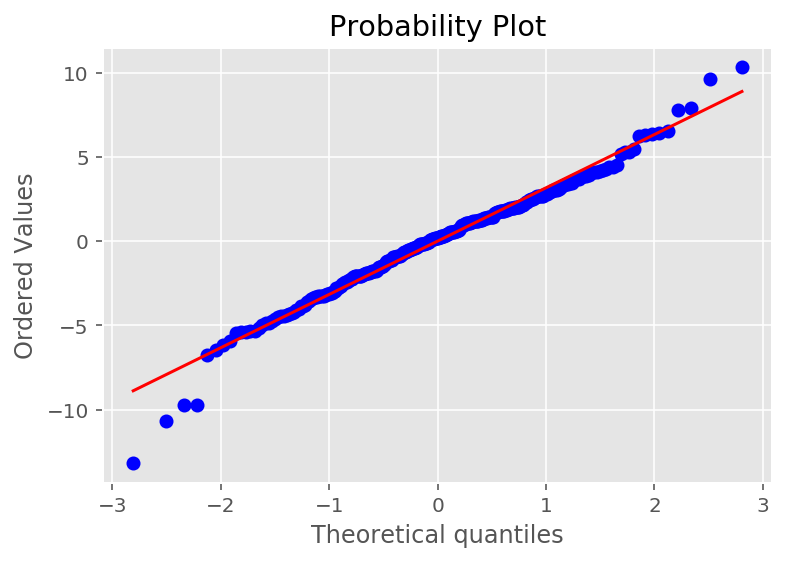

In [ ]:
sp.probplot(residuals, plot = plt)
plt.show()

From the histogram the residuals are approximately normal. Compared to the full model, the reduced model's residuals appear to be more normal. This is also shown in the Probability Plot which looks about the same as the full model's Probability Plot.

<a name = "sc"></a>
# Summary & Conclusion

**Data Cleaning**

As a group, we decided to only focus on data in the years 2014 and 2015. This would give us the most recent and relevant statistics for all the variables considered, and a smaller dataset which is easier to work with. It was also to ensure that we are not working with data that heavily relies on a time sequence.
<br> </br>

A common occurrence throughout the original dataset, were missing values. It was especially prevalent in variables: alcohol, total expenditure, GDP, population, and a few more. In fact, alcohol consumption per capita had the most missing records, with a count of 183.
These tuples had to be either removed from the table or set to 0.00 depending on the type of variable. In the case of population, for example, the entry had to be removed - for a population of 0.00 would not be appropriate.
<br> </br>

Other changes were also made so we could work with the data. The explanatory variables: country, year and status had to be converted to an object type rather than an integer or float type. This distinction was clear with the variables country and status, as country would be the name of a country, and status, uses words developed or developing to describe a country. In this table, year was used to note when a data entry was recorded. It performs more like an ordinal categorical variable, which provides a natural ranking for the entire dataset.

<br></br>
**Data Exploration**

From the numerical statistics with 6 plots together, we investigated that there are multiple factors that have a significant responsibility regarding life expectancy of all countries. 
<br></br>

Firstly, life expectancy varies widely between developing status. In developed countries the average life span is higher and consistent when compared to people from developing nations of the world. Then, it is clearly expressed that years of schooling also have a distinct relationship with life expectancy. The higher the number of years people attending school, the longer period of time they live. 
<br></br>

Lastly, GDP is also a key factor to impacting life expectancy. We see that the countries with lower GDPs have lower and more variance in life expectancy. It is also seen that a higher income contributes to a greater average and more stable life expectancy regardless of whether a country is is considered a developing or developed status. Although a small number of developing countries with relatively high GDP are still seen and enjoys a high average age, most of the countries recorded to have a higher number of schooling years and GDP are developed countries and predictably, have higher life expectancy. 
<br></br>

On the basis of findings, we arrived at conclusion that years of schooling and GDP are the main factors which may cause the low or high expectancy of the developed and developing countries in the world.

<br></br>
**Linear Regression Modelling**

From the model 'Life Expectancy and Education', where the explanatory variable was 'schooling' (amount of years in education) there was a correlation between life expectancy and education. Higher education years depicted a higher life expectancy in the model. 

In the model 'Life Expectancy and Economy', all the economic variables were used (which were all explanatory), to plot the actual life expectancy with a predicted life expectancy. This model seemed to be well fitted (had an adjusted R-Squared of 0.815), however some of the coefficients of the variables were insignificant. 

'Life Expectancy and Health' incorporated all the variables that were categorised under health - this included (and is not limited to) diseases such as 'HIV/AIDS', 'Diphtheria' and 'Polio' as well as other health related variables such as 'alcohol' and 'body-mass-index (BMI)'. This model had an adjusted R-Squared of approximately 0.6 and was not well fitted as it had large residual values. However unlike the model 'Life Expectancy and Economy', the p-values for the coefficients of the health variables were largly significant. 
<br></br>

The full model included all the explanatory variables, and was reasonably well fitted. It had an adjusted R-Squared of 0.857 and only a few large residuals. Unfortunately the majority of the coefficients of the variables were not significant as they possessed a p-value of above 0.05. In the reduced model these variables were taken out, but no siginificant changes were observed in the reduced model. After taking out the insignificant variables, only 3 were incorporated in the model, and it only had a slightly better adjusted R-Squared value of 0.858.
<br></br> 

The residuals mostly resembled the normal model - histograms and probability plots were used to display this attribute. In the reduced model, the residuals seemed to be more normal than the full model. 
<br></br> 

All the models plotted had a positive linear relationship.

<br></br>
**Conclusion**

All in all, this data set was not the most ideal for regression modelling as some of the data seemed to be invalid - for instance some countries had no years for 'schooling' or no data for GDP (this was handled by removing the tuples). From the plots, sometimes large residuals could be observed which could possibly mean that there were errors in the data.
<br></br>
In general, countries that had the 'developed' status, had a higher range of life expectancy, than countries of the 'developing' status. Our data exploration revealed a trend, where the Gross Domestic Product (*GDP*) and number of schooling years (*schooling*) have the biggest effects on life expectancy. It was seen that the higher the GDP of a country and/or average number of schooling years, the higher their average *life expectancy*.

We considered these two variables as the main contributors to life expectancy.


<a name= "References"> </a>
## **References**
---

Our dataset:
* Kumar, R. (2018), kaggle.com [online]
  <br> Available at: https://www.kaggle.com/kumarajarshi/life-expectancy-who
  <br> [Accessed on 05 Sep 2019]

Sources:

* RMIT MATH2350 (n.d.), Regression Case Study (Sample Project) 'Predicting Age in Census Data' 
  <br> Available at: https://rmit.instructure.com/courses/50622/files/9780553?fd_cookie_set=1 
  <br> [Accessed on 20 Oct 2019]